# TP3 - Views, Updates and Design

The objectives for this TP are:

1. Create and use SQL Views
2. Update database content
3. Design the database schema for a Social Network

___

For the first 2 parts we will use the **`wine.db`** database and the Tables created in the previous TP.

A reminder of the wine database schema:

<center>**Master1**</center>

|*Attribute*|         *Description*          |
| -------   |--------------------------------|
| NV        | Wine number                    |
| CRU       | Vineyard or group of vineyards |
| DEGRE     | Alcohol content                |
| MILL      | Vintage year                   |
| QTE       | Number of bottles harvested    |
| NP        | Producer number                |
| NOM       | Producer's last name           |
| PRENOM    | Producer's first name          |
| REGION    | Production region              |

<center>**Master2**</center>

|*Attribute*|                         *Description*                  |
| -------   |--------------------------------------------------------|
| NV        | Wine number                                            |
| CRU       | Vineyard or group of vineyards                         |
| DEGRE     | Alcohol content                                        |
| MILL      | Vintage year                                           |
| DATES     | Buying date                                            |
| LIEU      | Place where the wine was sold                          |
| QTE       | Number of bottles bought                               |
| NB        | Client (buveur) number                                 |
| NOM       | Client's last name                                     |
| PRENOM    | Client's first name                                    |
| TYPE      | Type of client by volume of purchases                  |
| REGION    | Administrative Region (different to production region) |


In [1]:
import sqlite3

In [2]:
def printSchema(connection):
    ### Source: http://stackoverflow.com/a/35092773/4765776
    for (tableName,) in connection.execute(
        """
        select NAME from SQLITE_MASTER where TYPE='table' order by NAME;
        """
    ):
        print("{}:".format(tableName))
        for (
            columnID, columnName, columnType,
            columnNotNull, columnDefault, columnPK,
        ) in connection.execute("pragma table_info('{}');".format(tableName)):
            print("  {id}: {name}({type}){null}{default}{pk}".format(
                id=columnID,
                name=columnName,
                type=columnType,
                null=" not null" if columnNotNull else "",
                default=" [{}]".format(columnDefault) if columnDefault else "",
                pk=" *{}".format(columnPK) if columnPK else "",
            ))

In [7]:
conn = sqlite3.connect('wine.db')
c = conn.cursor()
print("Database schema:")
printSchema(conn)

Database schema:
Consumer_2:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
MASTER1:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: QTE(NUM)
  5: NP(NUM)
  6: NOM(TEXT)
  7: PRENOM(TEXT)
  8: REGION(TEXT)
MASTER2:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: DATES(DATE)
  5: LIEU(TEXT)
  6: QTE(NUM)
  7: NB(NUM)
  8: NOM(TEXT)
  9: PRENOM(TEXT)
  10: TYPE(TEXT)
  11: REGION(TEXT)
Producer_1:
  0: NP(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: REGION(TEXT)
Production_1:
  0: NV(NUM)
  1: NP(NUM)
  2: QTE(NUM)
RBA:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
RBB:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
Region_2:
  0: LIEU(TEXT)
  1: REGION(TEXT)
Sales_2:
  0: NV(NUM)
  1: NB(NUM)
  2: DATES(NUM)
  3: LIEU(TEXT)
  4: QTE(NUM)
Wine_1:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
Wine_2:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)


Again, we will use **`%%sql`** magic for our queries

In [4]:
%load_ext sql
%sql sqlite:///wine.db

'Connected: @wine.db'

Recreate the Normalized Tables from **Master1** and **Master2** as you did in the TP2

In [5]:
%%sql DROP TABLE IF EXISTS Wine_1;

-- Create Wine_1 table
CREATE TABLE Wine_1 AS
SELECT DISTINCT NV , CRU, DEGRE, MILL
FROM MASTER1
WHERE NV IS NOT NULL;

DROP TABLE IF EXISTS Producer_1;

-- Create Producer_1 table
CREATE TABLE Producer_1 AS
SELECT DISTINCT NP , NOM, PRENOM, REGION
FROM MASTER1
WHERE NP IS NOT NULL;

DROP TABLE IF EXISTS Production_1;

-- Create Production_1 table
CREATE TABLE Production_1 AS
SELECT DISTINCT NV,NP, QTE
FROM MASTER1
WHERE NV is not null and NP is not null;

 * sqlite:///wine.db
Done.
Done.
Done.
Done.
Done.
Done.


[]

In [6]:
%%sql DROP TABLE IF EXISTS Wine_2;

-- Create Wine_2 table
CREATE TABLE Wine_2 AS
SELECT DISTINCT NV , CRU, DEGRE, MILL
FROM MASTER2
WHERE NV IS NOT NULL;

DROP TABLE IF EXISTS Consumer_2;
-- Create Consumer_2 table
CREATE TABLE Consumer_2 AS
SELECT DISTINCT NB , NOM, PRENOM, TYPE
FROM MASTER2
WHERE NB IS NOT NULL;

DROP TABLE IF EXISTS Sales_2;
-- Create Sales_2 table
CREATE TABLE Sales_2 AS
SELECT DISTINCT NV , NB, DATES, LIEU, QTE
FROM MASTER2
WHERE NV is not null and NB is not null;

DROP TABLE IF EXISTS Region_2;
-- Create Region_2 table
CREATE TABLE Region_2 AS
SELECT DISTINCT LIEU , REGION
FROM MASTER2
WHERE LIEU IS NOT NULL;

 * sqlite:///wine.db
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]

___
# PART I: CREATE AND USE VIEWS

A view is a virtual table based on the result-set of an SQL statement. Views are stored in the database with an associated name.

Views are created following the syntax:

```mysql
CREATE VIEW view_name AS
SELECT column1, column2.....
FROM table_name
WHERE [condition];
```

An useful command:

```mysql
DROP VIEW IF EXISTS view_name;
```


__Warning:__ Use `DROP` with caution (only drop something if you are sure)

__Note:__ You will find some cells marked as "Test" that will help you check your work. Do NOT modify them. 

#### Exercise 1.1

Create a view "**bons_buveurs**" with the clients (buveurs) of type 'gros' or 'moyen'.

In [8]:
%%sql 
DROP VIEW bons_buveurs

 * sqlite:///wine.db
Done.


[]

In [9]:
%%sql
CREATE VIEW bons_buveurs AS
SELECT * FROM Consumer_2 
WHERE TYPE in ('gros','moyen')

 * sqlite:///wine.db
Done.


[]

In [10]:
# Test
%sql SELECT * FROM bons_buveurs ORDER BY NB;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


#### Exercise 1.2

Create the view "**buveurs_asec**" with clients (buveurs) who have not bought any wine.

In [11]:
%%sql
CREATE VIEW buveurs_asec AS
SELECT DISTINCT * FROM  Consumer_2
WHERE NB not in (SELECT NB FROM Sales_2
                )

 * sqlite:///wine.db
(sqlite3.OperationalError) table buveurs_asec already exists
[SQL: CREATE VIEW buveurs_asec AS
SELECT DISTINCT * FROM  Consumer_2
WHERE NB not in (SELECT NB FROM Sales_2
                )]
(Background on this error at: http://sqlalche.me/e/13/e3q8)


In [12]:
# Test
%sql SELECT * FROM buveurs_asec ORDER BY nb;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


#### Exercise 1.3

Create the view "**buveurs_achats**" complementary to the previous one.

In [13]:
%%sql
CREATE VIEW buveurs_achats AS
SELECT DISTINCT * FROM  Consumer_2
WHERE NB in (SELECT NB FROM Sales_2
                )

 * sqlite:///wine.db
(sqlite3.OperationalError) table buveurs_achats already exists
[SQL: CREATE VIEW buveurs_achats AS
SELECT DISTINCT * FROM  Consumer_2
WHERE NB in (SELECT NB FROM Sales_2
                )]
(Background on this error at: http://sqlalche.me/e/13/e3q8)


In [14]:
# Test
%sql SELECT * FROM buveurs_achats ORDER BY nb;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
1,Aristote,None,petit
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
5,Audiberti,Jacques,petit
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
9,Ajar,Emile,petit
10,Andersen,Yann,gros


#### Exercise 1.4

Create the view "**q83pl**" (LIEU, CRU, QTE_BUE) that provides by LIEU and CRU the total quantities bought in 1983 by all the clients (buveurs).

In [15]:
%%sql
CREATE VIEW q83pl AS
SELECT LIEU, CRU, sum(QTE) as QTE_BUE 
FROM Sales_2 as s JOIN Wine_2 as w ON (s.NV=w.NV)
WHERE SUBSTR(DATES,1,4) = "1983" 
GROUP BY LIEU,CRU
ORDER BY LIEU

 * sqlite:///wine.db
(sqlite3.OperationalError) table q83pl already exists
[SQL: CREATE VIEW q83pl AS
SELECT LIEU, CRU, sum(QTE) as QTE_BUE 
FROM Sales_2 as s JOIN Wine_2 as w ON (s.NV=w.NV)
WHERE SUBSTR(DATES,1,4) = "1983" 
GROUP BY LIEU,CRU
ORDER BY LIEU]
(Background on this error at: http://sqlalche.me/e/13/e3q8)


In [16]:
# Test
%sql SELECT * FROM q83pl;

 * sqlite:///wine.db
Done.


LIEU,CRU,QTE_BUE
CAEN,Seyssel,3
LILLE,Pommard,5
LYON,Beaujolais Villages,10
LYON,Julienas,2
PARIS,Beaujolais Primeur,4
PARIS,Coteaux du Tricastin,1
PARIS,Pouilly Vinzelles,3
RENNES,Mercurey,1
ROCQUENCOURT,Beaujolais Villages,260
ROCQUENCOURT,Saint Amour,80


#### Exercise 1.5

Can we define the same view with ascending order over the attribute "QTE"? Provide an explanation for your answer.

Answer: No, ordering over the attribute "QTE" would not give the result. Indeed sorting over QTE would sort over the original values while "QTE_BUE" represents the sum of wines that were bought in 1983.

___
# PART II: UPDATE DATABASE CONTENT

The syntax for the `UPDATE` operation is:

```sql
UPDATE table_name
SET column1 = value1, column2 = value2...., columnN = valueN
WHERE [condition];
```

The syntax for the `INSERT` operation is:

```sql
INSERT INTO table_name [(column1, column2, column3,...columnN)]  
VALUES (value1, value2, value3,...valueN);
```

Database updates are commited automatically in Jupyter/Python. _Transactions_ are an option to control and reverse changes. Additionally we can just reload a backup of the database (NOT an option in deployed systems)

__Note:__ Different to other Database Management Systems, SQLite views are read-only and so you can not execute a `DELETE`, `INSERT` or `UPDATE` statement on a view.

#### Exercise 2.1

Create a table "**RBB**" with the same schema as "**bons_buveurs**" which contains the tuples selected from "**bons_buveurs**"

In [24]:
%%sql DROP TABLE IF EXISTS RBB;

CREATE TABLE RBB AS
SELECT * FROM bons_buveurs
ORDER BY NB

 * sqlite:///wine.db
Done.
Done.


[]

In [18]:
# Test
%sql SELECT * FROM RBB;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


#### Exercise 2.2

Update the table you used to create "**bons_buveurs**": Change the "type" to 'gros' if the total of quantities bought is over 100.

Find the instances to update (schema may differ from the one in your table)

In [19]:
%%sql 
SELECT * FROM (SELECT c.NB, NOM, PRENOM, TYPE, sum(QTE) as total 
               FROM Consumer_2 as c, Sales_2 as s 
               WHERE (c.NB=s.NB) and TYPE != "gros" 
               GROUP BY s.NB)
WHERE total > 100

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE,total
2,Artaud,Antonin,moyen,583
5,Audiberti,Jacques,petit,113
9,Ajar,Emile,petit,140
44,Gide,Andre,petit,171


Update instances

In [20]:
%%sql
UPDATE Consumer_2
SET TYPE = "gros"
WHERE NB in (SELECT NB FROM (SELECT c.NB, NOM, PRENOM, TYPE, sum(QTE) as total 
               FROM Consumer_2 as c, Sales_2 as s 
               WHERE (c.NB=s.NB) and TYPE != "gros" 
               GROUP BY s.NB)
WHERE total > 100)

 * sqlite:///wine.db
4 rows affected.


[]

#### Exercise 2.3

Compare the content of _table_ "**RBB**" and the _view_ "**bons_buveurs**" after the update. What differences do you see? Explain

Answer: 

In [21]:
%%sql
SELECT * FROM RBB

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


In [22]:
%%sql
SELECT * FROM bons_buveurs ORDER BY NB

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,gros
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
5,Audiberti,Jacques,gros
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
9,Ajar,Emile,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen


We notice that the 4 utpdates have been taken into accound for the view "bons_buveurs", because we have updated the table "Consumer_2" ("bons_buveurs" is based on "Consumer_2), but not for the table "RBB". Indeed, views cannot be manipulated using SQLite, so RBB has not been updated as well.

#### Exercise 2.4

Create a table "**RBA**" with the same schema as "**buveurs_asec**" which contains the tuples selected from "**buveurs_asec**"

In [25]:
%%sql DROP TABLE IF EXISTS RBA;

CREATE TABLE RBA AS
SELECT * FROM buveurs_asec
ORDER BY NB

 * sqlite:///wine.db
Done.
Done.


[]

In [26]:
# Test
%sql SELECT * FROM RBA

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


#### Exercise 2.5

Insert a tuple (101, 'your last name', 'your first name', 'your type of purchases(petit, moyen, or gros)') to "**RBA**".

In [27]:
%%sql 
INSERT INTO RBA
VALUES (101, "Robiliard", "Adrien","moyen");

 * sqlite:///wine.db
1 rows affected.


[]

In [28]:
# Test
%sql SELECT * FROM RBA

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


#### Exercise 2.6

Compare the content of _table_ "**RBA**" and the _view_ "**buveurs_asec**". What differences do you see? Explain

Answer:

In [29]:
# Test
%sql SELECT * FROM RBA

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


In [30]:
%%sql
SELECT * FROM buveurs_asec ORDER BY NB

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


As the prior question, we notice that the new tuple (101,"Adrien","Robiliard","moyen") is present in the view "RBA" but not in "buveurs_asec" for the same reason as the one given in 2.5.

___
# PART III: Design the database schema for posts in a Social Network

In this section your task is to design the database schema for a social network app of a new startup:

The new social network will contain users, where each user will have a name, a nickname, an email, date of birth, and an address (Street, City, State, Country, Postal Code). Users can be friends of other users, and can publish posts. Each post can contain a text, date and attachment. Posts can be either original posts or replies so the app needs to handle both scenarios. When users log in, the app needs to display the posts of their friends.

**Note:** You can create diagrams of your proposal and insert them as images into this notebook.

#### Exercise 3.1

Write and explain the design of the relations of your database

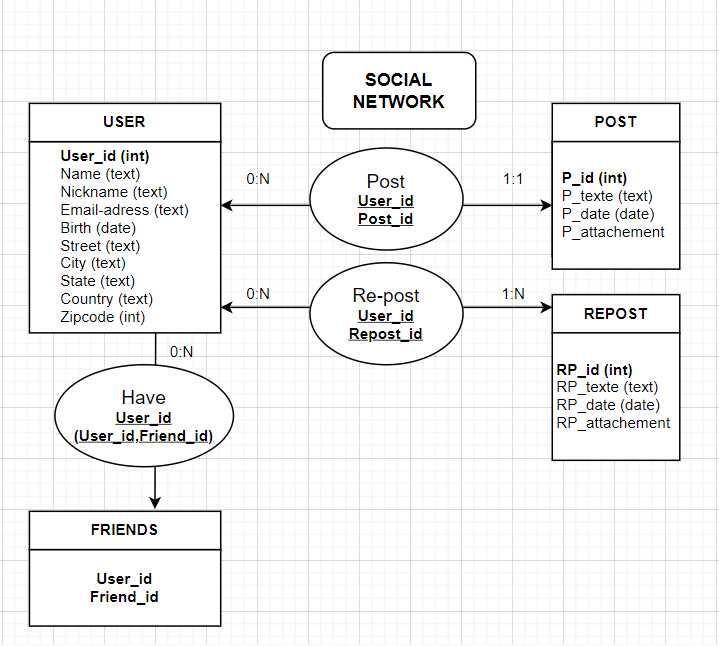

In [38]:
from IPython.display import Image
Image("Capture_TP4.png")

There are 4 tables :
- USER : it's just a basic table with users' informations, "User_id" being the primary key. 
- FRIENDS : each user can have friends. There are two attributes, "User_id" and "Friend_id", which both form the primary key of this table. Indeed, a user can have several friends. 
- POST : users can write posts. This table sums up attributes for each post ("Texte","Date" and "Attachement") and the primary key "Post_id".
- REPOST : similarly to the table POST, users can also "re-post" former posts.


Relations between tables :
- USER - FRIENDS : 0:N, a user can have 0 to many friends.

- USER - POST : 0:N, a user can write several posts, or none.
- POST - USER : 1:1, if a post is in the POST table, it means that a user wrote it. I assume that 2 posts with the exact same Texte, Date and Attachement attributes, written by two different users have not the same Post_id.

- USER - REPOST : 0:N, same as the USER-POST relation 
- REPOST - USER : 1:1, same as the POST-USER relation

#### Exercise 3.2

Write a view to retrieve the posts to display when a user logs in. Consider that some users may have a lot of friends and you need to limit the number of post to display. How would you select relevant posts to display first? What kind of information would you use/add in the database for this purpose? Explain your answer.

__Note:__ Limiting the number of posts just by count is too simplistic, the user could be missing something interesting to him/her.

- First we need to create a view (USER_FRIENDS) that contains all the friends of our specific user logged in.
- Then, we need to create a second view (USER_FRIENDS_PREF) showing posts/reposts published by those friends (who are present in the first view).
- The 3rd step is about finding the "interesting posts/reposts". In order to do this, we need to introduce new attributes to the table USER, which could be attributes like "Music", "Cinema","Food" ... rated from 0 to 5.
A more simple way to do it would be to introduce a new attribute in the USER table, called Pref, ranging from 0 to 5. I have assumed it was the case.
So, the 3rd view (USER_FRIENDS_POSTS_REPOSTS) corresponds to those interesting posts & reposts.
- Last, a final view (FINAL) is created, gathering the posts & reposts from the last view, and the posts & reposts (if they exist) of the initial user logged in. I have also decided to limit these posts & reposts to those occured in the last 3 days.

Precision: Google Colab does not stand the "Texte brut" cells format, then I had to write the next cells in "Code" format. In consequence the next codes should not be runned, it's just for reading (unless we want to create those views and insert values).

Let's assume that the user logged in has a "User_id" equal to 0000 and Pref equal to 4

In [ ]:
CREATE VIEW USER_FRIENDS as
SELECT Friend_id 
FROM FRIENDS 
WHERE User_id = 0000 

Then we select the user's friends with same preferences.

In [ ]:
CREATE USER_FRIENDS_PREF as
SELECT * FROM USER_FRIENDS 
WHERE Pref = 4

We can now select their related posts

In [ ]:
CREATE VIEW USER_FRIENDS_POSTS_REPOSTS as
SELECT P_id, P_texte, P_date, P_attachement, RP_id, RP_texte, RP_date, RP_attachement,
FROM POST as p, REPOST as rp, USER_FRIENDS_PREF as ufp
WHERE (p.P_id = ufp.P_id) and (rp.RP_id = ufp.P_id)

Finally, we gather posts and reposts from this last view, and posts & reposts from the user logged in. We can also limit the display of posts & reposts occured in the last 3 days.

In [ ]:
CREATE VIEW FINAL as 
SELECT * FROM USER_FRIENDS_POSTS_REPOSTS
UNION 
SELECT (SELECT P_id, P_texte, P_date, P_attachement, RP_id, RP_texte, RP_date, RP_attachement,
        FROM POST as p, REPOST as rp
        WHERE (p.P_id = rp.RP_id)
LIMIT TIMEDIFF(CURTIME(), DATE) < 72 # TIMEDIFF calcule la différence de dates en nombre d'heures